In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [35]:

team_ratings_df = pd.read_csv("/home/khansah5/CMSE202/Final project/Project-8---Sports-Analysis/data/cleandata/23-24TeamRatings.csv")
team_ratings_df.head()


,Rk,Team,Conf,Div,W,L,W/L%,MOV,ORtg,DRtg,NRtg,MOV/A,ORtg/A,DRtg/A,NRtg/A
0,1,Boston Celtics,E,A,64,18,0.780,11.34,124.23,112.51,11.71,10.74,123.81,112.70,11.11
1,2,Oklahoma City Thunder,W,NW,57,25,0.695,7.41,120.43,113.12,7.31,7.36,120.49,113.23,7.26
2,3,Minnesota Timberwolves,W,NW,56,26,0.683,6.45,116.63,109.98,6.65,6.38,116.53,109.95,6.57
3,4,Denver Nuggets,W,NW,57,25,0.695,5.26,119.49,114.05,5.44,5.23,119.60,114.20,5.40
4,5,New York Knicks,E,A,50,32,0.610,4.59,119.11,114.22,4.89,4.36,118.93,114.28,4.66


In [19]:
shooting_type_df = pd.read_csv("/home/khansah5/CMSE202/Final project/Project-8---Sports-Analysis/data/cleandata/Cleaned_ShootingTypeStats.csv")
shooting_type_df.head()


,Rk,Team,G,MP,FG%,Dist.,2P,0-3,3-10,10-16,...,%Astd2P,%Asted3P,%FGDunks,TotalDunksMade,%FGLayups,TotalLayups,%3PA,3P%Corner,Heaves Attempt,Heaves Made
0,1,Atlanta Hawks,82,19855,0.465,14.1,0.592,0.247,0.194,0.104,...,0.537,0.791,0.065,445,0.259,1006,0.260,0.380,15,0
1,2,Boston Celtics,82,19830,0.487,15.6,0.529,0.212,0.181,0.083,...,0.503,0.796,0.066,439,0.249,1086,0.204,0.441,11,1
2,3,Brooklyn Nets,82,19805,0.456,14.2,0.588,0.242,0.199,0.094,...,0.527,0.844,0.054,353,0.266,1081,0.261,0.414,23,1
3,4,Chicago Bulls,82,19980,0.470,13.6,0.642,0.266,0.181,0.106,...,0.488,0.876,0.039,236,0.274,1156,0.275,0.385,11,0
4,5,Charlotte Hornets,82,19730,0.460,14.1,0.609,0.251,0.198,0.094,...,0.525,0.839,0.059,381,0.259,1036,0.219,0.367,21,0


In [20]:
advanced_stats_df = pd.read_csv("/home/khansah5/CMSE202/Final project/Project-8---Sports-Analysis/data/cleandata/Cleaned_TeamAdvancedStats.csv")
advanced_stats_df.head()


,Rk,Team,Age,W,L,PW,PL,MOV,SOS,SRS,...,TOV%,ORB%,FT/FGA,eFG%.1,TOV%.1,DRB%,Opponent FT/FGA,Arena,Attend.,Attend./G
0,1.0,Boston Celtics,28.2,64.0,18.0,66,16,11.34,-0.60,10.75,...,10.8,24.9,0.180,0.523,10.8,76.3,0.145,TD Garden,785396,19156
1,2.0,Oklahoma City Thunder,23.4,57.0,25.0,58,24,7.41,-0.05,7.36,...,11.4,21.1,0.198,0.530,13.6,73.8,0.202,Paycom Center,715509,17451
2,3.0,Minnesota Timberwolves,27.2,56.0,26.0,57,25,6.45,-0.07,6.39,...,13.0,23.2,0.209,0.515,12.9,76.9,0.197,Target Center,738984,18024
3,4.0,Denver Nuggets,27.1,57.0,25.0,54,28,5.26,-0.03,5.23,...,11.5,25.5,0.170,0.526,11.2,75.6,0.195,Ball Arena,807062,19684
4,5.0,New York Knicks,26.4,50.0,32.0,53,29,4.59,-0.23,4.36,...,11.9,29.4,0.192,0.543,12.3,76.1,0.176,Madison Square Garden (IV),808885,19729


In [21]:
stats_df = pd.read_csv("/home/khansah5/CMSE202/Final project/Project-8---Sports-Analysis/data/cleandata/Cleaned_TeamStats.csv")
stats_df.head()


,Rk,Team,G,MP,FG,FGA,FG%,3P,3PA,3P%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1.0,Indiana Pacers,82,240.3,47.0,92.7,0.507,13.2,35.3,0.374,...,0.782,10.1,31.4,41.5,30.8,7.7,5.9,12.9,21.4,123.3
1,2.0,Boston Celtics,82,241.8,43.9,90.2,0.487,16.5,42.5,0.388,...,0.807,10.7,35.6,46.3,26.9,6.8,6.6,11.9,16.2,120.6
2,3.0,Oklahoma City Thunder,82,241.5,44.5,89.3,0.499,13.3,34.2,0.389,...,0.825,8.8,33.2,42.0,27.1,8.5,6.6,12.7,18.8,120.1
3,4.0,Milwaukee Bucks,82,241.5,43.1,88.5,0.487,14.2,38.1,0.373,...,0.774,9.4,34.8,44.2,26.5,6.8,5.0,12.9,19.2,119.0
4,5.0,Atlanta Hawks,82,242.1,43.0,92.5,0.465,13.7,37.7,0.364,...,0.797,12.5,32.2,44.7,26.6,7.5,4.5,13.5,18.6,118.3


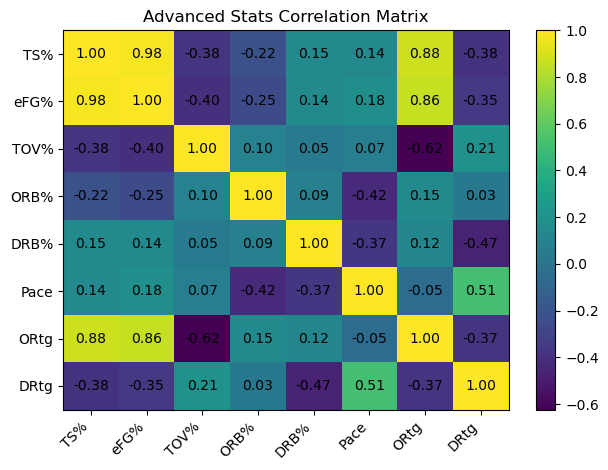

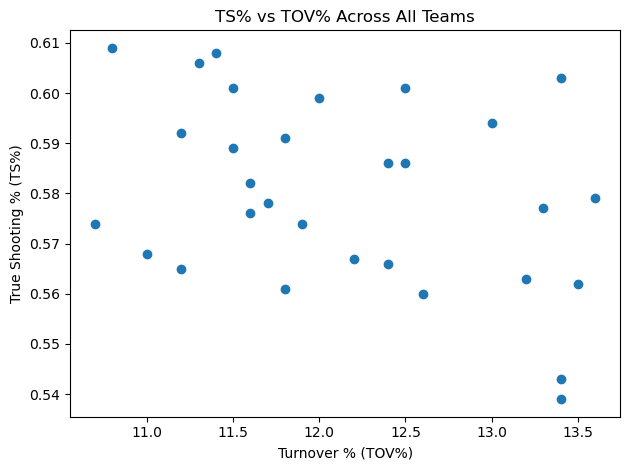

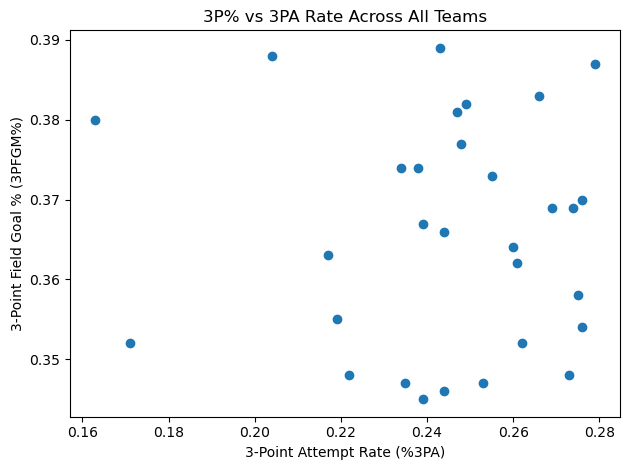

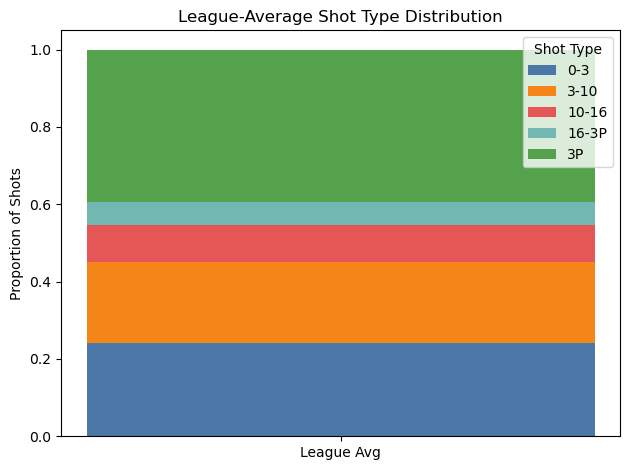

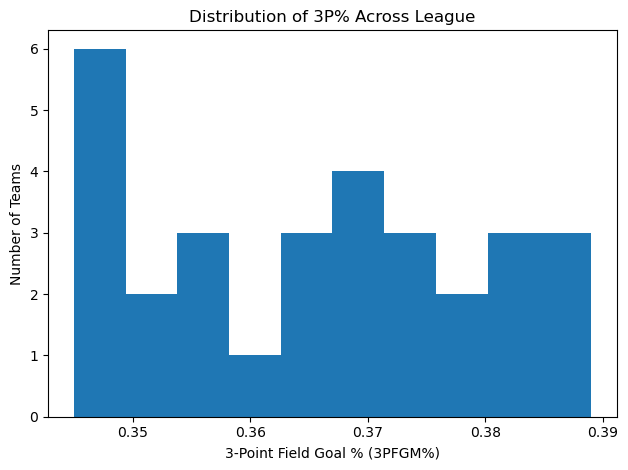

In [37]:
# 1. Correlation heatmap for advanced stats
adv_metrics = ['TS%', 'eFG%', 'TOV%', 'ORB%', 'DRB%', 'Pace', 'ORtg', 'DRtg']
corr = advanced_stats_df[adv_metrics].corr()

plt.figure()
plt.imshow(corr, aspect='auto', interpolation='none')
plt.colorbar()
plt.xticks(range(len(adv_metrics)), adv_metrics, rotation=45, ha='right')
plt.yticks(range(len(adv_metrics)), adv_metrics)
for i in range(len(adv_metrics)):
    for j in range(len(adv_metrics)):
        plt.text(j, i, f'{corr.iloc[i, j]:.2f}', ha='center', va='center')
plt.title('Advanced Stats Correlation Matrix')
plt.tight_layout()
plt.show()

# 2. Scatter: True Shooting % vs Turnover %
plt.figure()
plt.scatter(advanced_stats_df['TOV%'], advanced_stats_df['TS%'])
plt.xlabel('Turnover % (TOV%)')
plt.ylabel('True Shooting % (TS%)')
plt.title('TS% vs TOV% Across All Teams')
plt.tight_layout()
plt.show()

# 3. Scatter: 3-Point Attempt Rate vs 3-Point % (Efficiency vs Volume)
plt.figure()
plt.scatter(shooting_type_df['%3PA'], shooting_type_df['3PFGM%'])
plt.xlabel('3-Point Attempt Rate (%3PA)')
plt.ylabel('3-Point Field Goal % (3PFGM%)')
plt.title('3P% vs 3PA Rate Across All Teams')
plt.tight_layout()
plt.show()

# 4. Bar: League-average shot-distribution (stacked)
shot_cols = ['0-3', '3-10', '10-16', '16-3P', '3P']
mean_dist = shooting_type_df[shot_cols].mean()

plt.figure()
bottom = 0
colors = ['#4C78A8','#F58518','#E45756','#72B7B2','#54A24B']
for val, col, c in zip(mean_dist, shot_cols, colors):
    plt.bar('League Avg', val, bottom=bottom, label=col, color=c)
    bottom += val

plt.ylabel('Proportion of Shots')
plt.title('League-Average Shot Type Distribution')
plt.legend(title='Shot Type')
plt.tight_layout()
plt.show()

# 5. Histogram: Distribution of 3P% Across Teams
plt.figure()
plt.hist(shooting_type_df['3PFGM%'], bins=10)
plt.xlabel('3-Point Field Goal % (3PFGM%)')
plt.ylabel('Number of Teams')
plt.title('Distribution of 3P% Across League')
plt.tight_layout()
plt.show()


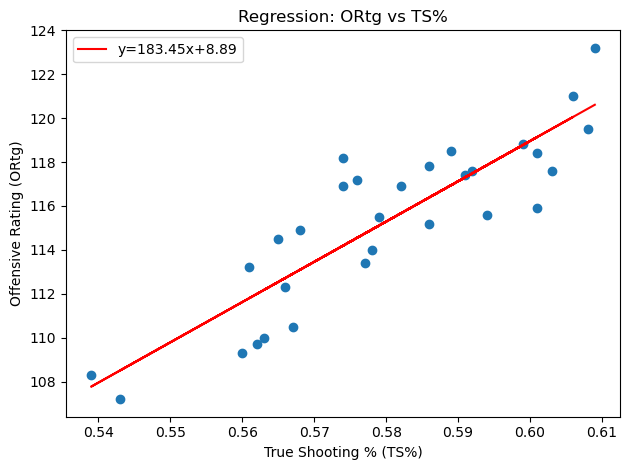

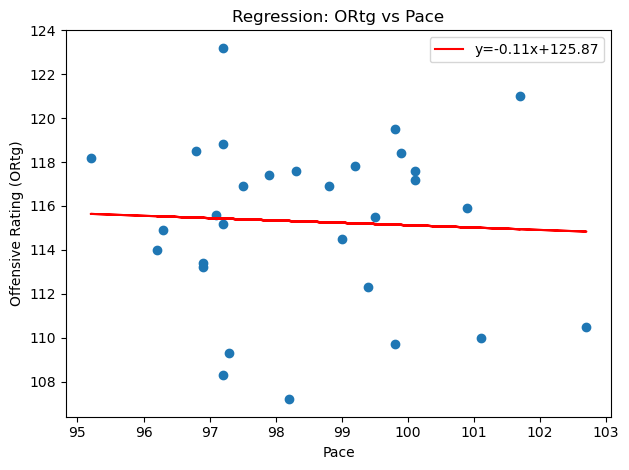

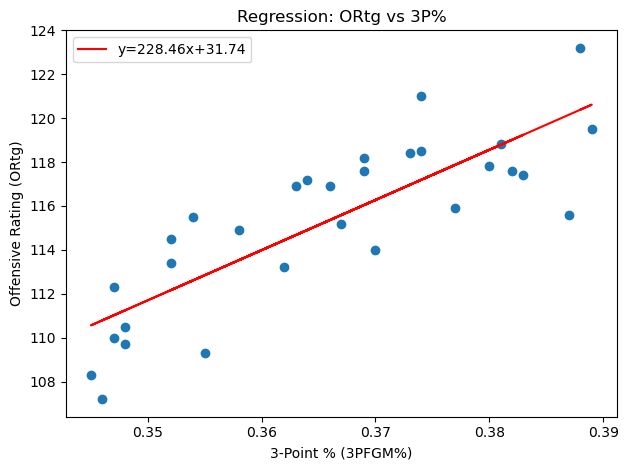

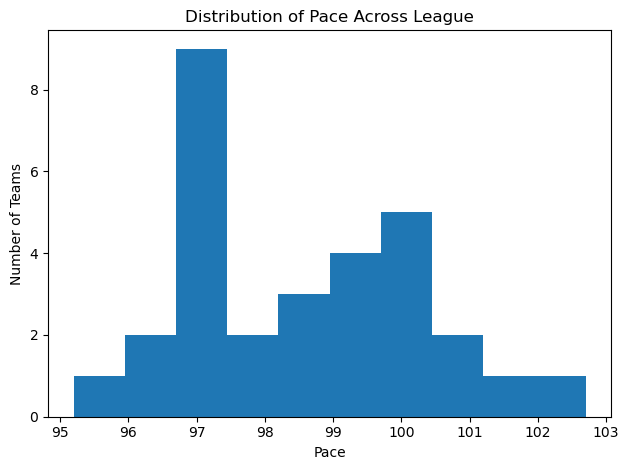

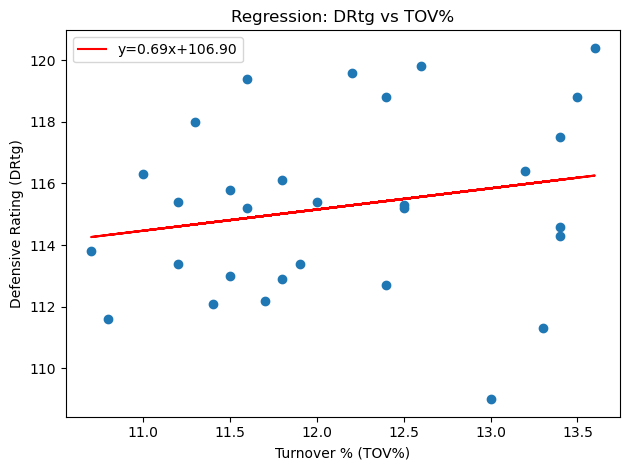

In [39]:
# Prepare merged DataFrame
adv = advanced_stats_df[['Team', 'TS%', 'Pace', 'ORtg', 'TOV%']]
shoot = shooting_type_df[['Team', '3PFGM%', '%3PA']]
merged = pd.merge(adv, shoot, on='Team')

# 1) Regression: ORtg vs TS%
x, y = merged['TS%'], merged['ORtg']
m, b = np.polyfit(x, y, 1)
plt.figure()
plt.scatter(x, y)
plt.plot(x, m*x + b, '-', label=f'y={m:.2f}x+{b:.2f}', color='red')
plt.xlabel('True Shooting % (TS%)')
plt.ylabel('Offensive Rating (ORtg)')
plt.title('Regression: ORtg vs TS%')
plt.legend()
plt.tight_layout()
plt.show()

# 2) Regression: ORtg vs Pace
x, y = merged['Pace'], merged['ORtg']
m, b = np.polyfit(x, y, 1)
plt.figure()
plt.scatter(x, y)
plt.plot(x, m*x + b, '-', label=f'y={m:.2f}x+{b:.2f}',color='red')
plt.xlabel('Pace')
plt.ylabel('Offensive Rating (ORtg)')
plt.title('Regression: ORtg vs Pace')
plt.legend()
plt.tight_layout()
plt.show()

# 3) Regression: ORtg vs 3P%
x, y = merged['3PFGM%'], merged['ORtg']
m, b = np.polyfit(x, y, 1)
plt.figure()
plt.scatter(x, y)
plt.plot(x, m*x + b, '-', label=f'y={m:.2f}x+{b:.2f}', color='red')
plt.xlabel('3-Point % (3PFGM%)')
plt.ylabel('Offensive Rating (ORtg)')
plt.title('Regression: ORtg vs 3P%')
plt.legend()
plt.tight_layout()
plt.show()

# 4) Histogram: Pace distribution
plt.figure()
plt.hist(merged['Pace'], bins=10)
plt.xlabel('Pace')
plt.ylabel('Number of Teams')
plt.title('Distribution of Pace Across League')
plt.tight_layout()
plt.show()

# 5) Regression: DRtg vs TOV%
x, y = merged['TOV%'], advanced_stats_df.set_index('Team').loc[merged['Team'], 'DRtg']
m, b = np.polyfit(x, y, 1)
plt.figure()
plt.scatter(x, y)
plt.plot(x, m*x + b, '-', label=f'y={m:.2f}x+{b:.2f}', color='red')
plt.xlabel('Turnover % (TOV%)')
plt.ylabel('Defensive Rating (DRtg)')
plt.title('Regression: DRtg vs TOV%')
plt.legend()
plt.tight_layout()
plt.show()


KeyError: "['DRtg'] not in index"